B) CNN

Import tensorflow & libraries

Load Fashion MNIST dataset for training

Pre-processing the dataset

Build the model - CNN (2D array)

Train the model

Compiling the model

Evaluating the model

Prediction

Prediction on unseen dataset

1. Import tensorflow & libraries

In [ ]:
!pip install -q tensorflow tensorflow-datasets matplotlib

In [ ]:
from __future__ import absolute_import, division, print_function

#Importing Tensorflow and Tensorflow Datasets

import tensorflow as tf
import tensorflow_datasets as tfds

#Helper Libraries

import math
import numpy as np
import matplotlib.pyplot as plt

#Improve Progress Bar Display

import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print(tf.__version__)

2.5.0


2. Load Fashion MNIST Dataset for training

In [ ]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test'] 

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteMOOBJP/fashion_mnist-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteMOOBJP/fashion_mnist-test.tfrecord


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"] 
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Exploring the Data

Before training and testing, let's explore the format of the dataset.

The code below will show that there are 60,000 images in the training set and 10,000 in the testing set:

In [ ]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

print("Number of training examples: {}".format(num_train_examples))
print("Number of testing examples: {}".format(num_test_examples))

Number of training examples: 60000
Number of testing examples: 10000


In [ ]:
type(train_dataset)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

3. Pre-Processing the Dataset

The value of each pixel in the image data is an integer in the range [0, 255].

For the model to work properly, these values need to be normalized to the range [0, 1].

So here we create a normalization function, and then apply it to each image in the test and train datasets.

In [ ]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

# The map function applies the normalization function to each element in the train and test datasets

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

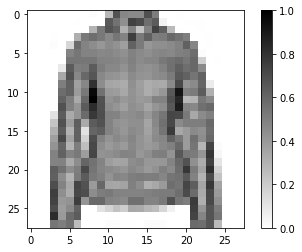

In [ ]:
# Take a single image, and remove the colour dimension by reshaping

for image, label in test_dataset.take(1):
    break
image = image.numpy().reshape((28,28))

# Plotting the image

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

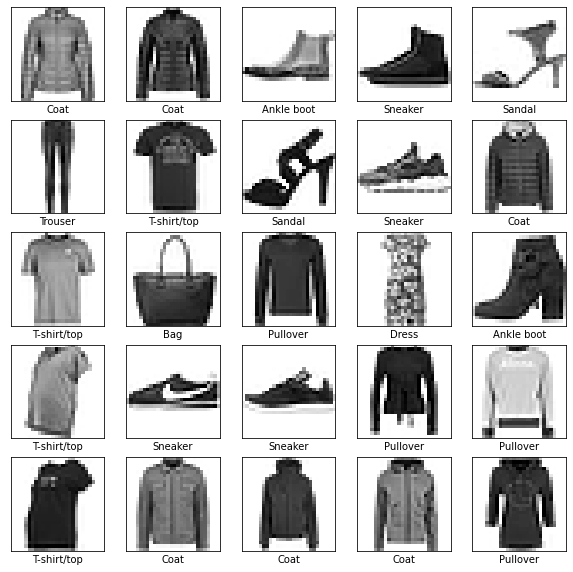

In [ ]:
plt.figure(figsize=(10,10))
i = 0

for (image,label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

4. Build the model - CNN
* Setting up layers
* compiling the model

In [ ]:
cnn_model = tf.keras.Sequential([
            tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu, input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D((2, 2), strides=2),
            tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu, input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D((2, 2), strides=2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(10, activation=tf.nn.softmax)
            ])

This network layers are:

* "convolutions" tf.keras.layers.Conv2D and MaxPooling2D— Network start with two pairs of Conv/MaxPool. The first layer is a Conv2D filters (3,3) being applied to the input image, retaining the original image size by using padding, and creating 32 output (convoluted) images (so this layer creates 32 convoluted images of the same size as input). After that, the 32 outputs are reduced in size using a MaxPooling2D (2,2) with a stride of 2. The next Conv2D also has a (3,3) kernel, takes the 32 images as input and creates 64 outputs which are again reduced in size by a MaxPooling2D layer. Chain multiples of convolutions together. 

* output tf.keras.layers.Dense — A 128-neuron, followed by 10-node softmax layer. Each node represents a class of clothing. As in the previous layer, the final layer takes input from the 128 nodes in the layer before it, and outputs a value in the range [0, 1], representing the probability that the image belongs to that class. The sum of all 10 node values is 1.

5. Compiling the Model

In [ ]:
cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

6. Train the model

Training the Model is also very similar to the previous model but the only difference is that we’re having 10 epochs instead of 5

In [ ]:
cnn_model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 75s 37ms/step - loss: 0.3920 - accuracy: 0.8579
Epoch 2/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2614 - accuracy: 0.9033
Epoch 3/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.2094 - accuracy: 0.9237
Epoch 4/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.1815 - accuracy: 0.9334
Epoch 5/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.1546 - accuracy: 0.9424
Epoch 6/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.1305 - accuracy: 0.9515
Epoch 7/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.1117 - accuracy: 0.9581
Epoch 8/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0947 - accuracy: 0.9646
Epoch 9/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0756 - accuracy: 0.9722
Epoch 10/10
1875/1875 [==============================] - 68s 36m

After running 10th epoch on the train dataset

* loss ~6.98%
* accuracy ~97%

Save the model

In [ ]:
# save model
cnn_model.save('final_model.h5')

7. Evaluating the model

In [ ]:
test_loss, test_accuracy = cnn_model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 5s 15ms/step - loss: 0.3235 - accuracy: 0.9155
Accuracy on test dataset: 0.9154999852180481


Test dataset:

* loss ~29%
* accuracy ~92%

Looking at our data, the accuracy of the test dataset is similar to the train dataset (92% and 97%).

8. Prediction

In [ ]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = cnn_model.predict(test_images)

In [ ]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_labels, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_labels:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f} ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_labels]), color=color)

def plotting_probabilities(i, predictions_array, true_labels):
  predictions_array, true_labels = predictions_array[i], true_labels[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_labels].set_color('blue') 

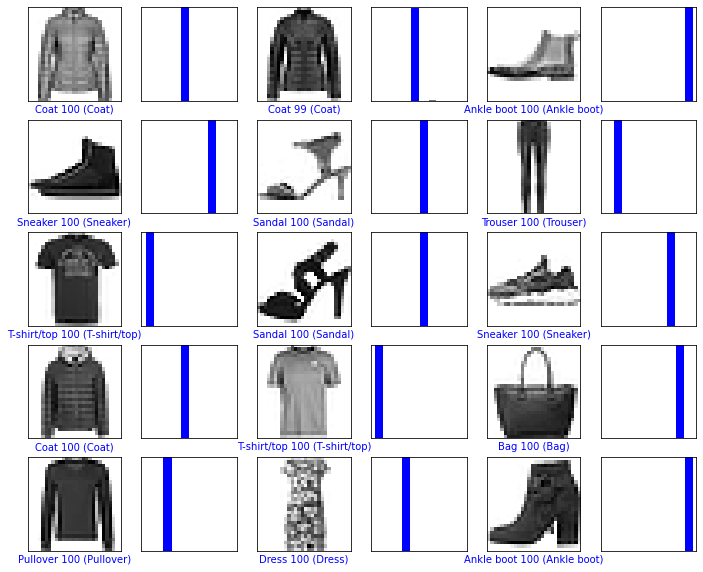

In [ ]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plotting_probabilities(i, predictions, test_labels)

9. Prediction on unseen dataset

In [ ]:
import io
import requests
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


class names:

0 = 'T-shirt/top'

1 = 'Trouser',

2 = 'Pullover',

3 = 'Dress',

4 = 'Coat',

5 = 'Sandal',

6 = 'Shirt',

7 = 'Sneaker',

8 = 'Bag',

9 = 'Ankle boot'

We can use our saved model to make a prediction on new images.
Previously save model → cnn_model.save('final_model.h5')

The model assumes that new images are:

* grayscale,
* segmented (1 image contains 1 centered piece of clothing on a black background)
* square image with size of 28×28 pixels

Load the sample_image.png‘ , an image extracted from the MNIST test dataset. You can save it in your current working directory with the filename ‘sample_image.png‘.

For this example, we expect class “2” for “Pullover” (jumper).

1. Load the image,
2. force it to be grayscale format,
3. convert the size to be 28×28 pixels.

The loaded image can then be resized to have a single channel and represent a single sample in a dataset.
The load_image() function implements this and will return the loaded image ready for classification.

NOTE: The pixel values are prepared in the same way as the pixel values were prepared for the training dataset when fitting the final model, in this case, normalized.

Running the example() 👇

1. first loads and prepares the image,
2. loads the model,
3. predicts that the loaded image

In [ ]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28, 1)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

# load an image and predict the class
def run_example():
	# load the image
	img = load_image("/content/gdrive/MyDrive/CVNLP Colab Notebooks/sample_image.png")
	# load model
	model = load_model('final_model.h5')
	# predict the class
	result = model.predict_classes(img)
	print(result[0])
 
# entry point, run the example
run_example()

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


2
